# Sprint10課題 深層学習スクラッチニューラルネットワーク

## この課題の目的

- スクラッチを通してニューラルネットワークの基礎を理解する
- 画像データの簡単な扱い方を知る

## スクラッチによる実装

NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。

今回は多クラス分類を行う3層のニューラルネットワークを作成します。層の数などは固定した上でニューラルネットワークの基本を確認しましょう。次のSprintで層を自由に変えられる設計にしていきます。

### データセットの用意

MNISTデータセットを使用します。以下のコードを実行すればKerasによりデータセットをダウンロードし、展開まで行えます。

MNISTとは？

画像分類のための定番データセットで、手書き数字認識を行います。このデータセットには学習用6万枚、テスト用1万枚の28×28ピクセルの白黒画像、およびそれらが0〜9のどの数字であるかが含まれています。

画像データとは？

デジタル画像は点の集合で、これをピクセルと呼びます。一般的に白黒画像であればピクセルには0〜255の値が含まれます。一方、カラー画像であればR（赤）、G（緑）、B（青）それぞれに対応する0〜255の値が含まれます。機械学習をする上では、この0〜255の値一つひとつが特徴量として扱われます。0〜255は符号なしの8ビット整数で表せる範囲になるため、NumPyであれば「uint8」型の変数として保持できます。

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### データセットの確認

まず、どういったデータなのかを見てみます。

各データは28×28ピクセルの白黒画像です。

In [3]:
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

## 平滑化

(1, 28, 28)の各画像を、(1, 784)に変換します。これまで学んできた機械学習手法や、今回扱う全結合層のみのニューラルネットワークではこの形で扱います。全てのピクセルが一列になっていることを、平滑化（flatten）してあるという風に表現します。

補足

ここまで機械学習を学んでくる中で、特徴量の数を「次元」と呼んできました。その視点ではMNISTは784次元のデータです。一方で、NumPyのshapeが(784,)の状態を1次元配列とも呼びます。画像としての縦横の情報を持つ（28, 28)の状態であれば、2次元配列です。この視点では2次元のデータです。さらに、もしもカラー画像であれば(28, 28, 3)ということになり、3次元配列です。先ほどの視点では3次元のデータになります。しかし、白黒でもカラーでも平面画像であり、立体データではないという視点で、2次元のデータです。画像データを扱う際にはこのように「次元」という言葉が複数の意味合いで使われることに注意してください。

In [4]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

### 画像データの可視化

画像データを可視化します。plt.imshowに渡します。

[numpy.reshape — NumPy v1.15 Manual](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.reshape.html)

[matplotlib.pyplot.imshow — Matplotlib 3.0.2 documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html)

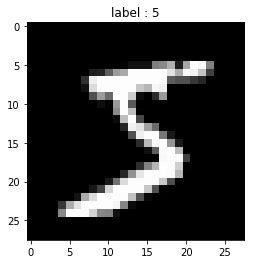

In [5]:
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

発展的話題

画像データは符号なし8ビット整数のuint8型で保持されることが一般的ですが、plt.imshowはより自由な配列を画像として表示することが可能です。例えば、以下のようにマイナスの値を持ったfloat64型の浮動小数点であってもエラーにはならないし、先ほどと全く同じ風に表示されます。

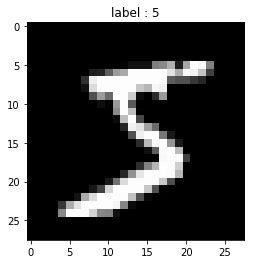

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [6]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # 値を確認

これは、自動的に値を0〜255の整数に変換して処理するように作られているからです。uint8型であっても最小値が0、最大値が255でない場合には色合いがおかしくなります。それを防ぐためには次のように引数を入れてください。

`
plt.imshow(image, 'gray', vmin = 0, vmax = 255)
`

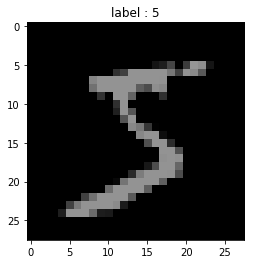

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [7]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray', vmin = 0, vmax = 255)
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # 値を確認

画像関係のライブラリではこの自動的なスケーリングが思わぬ結果を生むことがあるので、新しいメソッドを使うときには確認しておきましょう。

### 前処理

画像は0から255のuint8型で表されますが、機械学習をする上では0から1のfloat型で扱うことになります。色は理想的には連続値であり、それを特徴量とするからです。以下のコードで変換可能です。

In [8]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


また、正解ラベルは0から9の整数ですが、ニューラルネットワークで多クラス分類を行う際にはone-hot表現に変換します。scikit-learnのOneHotEncoderを使用したコードが以下です。このone-hot表現による値はそのラベルである確率を示していることになるため、float型で扱います。

In [9]:
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


[sklearn.preprocessing.OneHotEncoder — scikit-learn 0.20.0 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

さらに、学習用データ6万枚の内2割を検証用データとして分割してください。学習用データが48000枚、検証用データが12000枚となります。

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(48000, 784)
(12000, 784)


## 【問題1】ニューラルネットワーク分類器のクラスを作成

ニューラルネットワーク分類器のクラス<ScratchSimpleNeuralNetrowkClassifierを作成してください。

以下が雛形です。基本的な構成は機械学習編の線形回帰やロジスティック回帰などと同様です。

### ミニバッチ処理

これまでの機械学習スクラッチでは、全てのサンプルを一度に計算していました。しかし、ニューラルネットワークではデータを分割して入力する確率的勾配降下法が一般的です。分割した際のひとかたまりをミニバッチ、そのサンプル数をバッチサイズと呼びます。

今回はバッチサイズを10とします。今回使う学習用データは48000枚ですから、4800回の更新を繰り返すことになります。ニューラルネットワークではこれを4800回イテレーション（iteration）すると呼びます。学習データを一度全て見ると1回のエポック（epoch）が終わったことになります。このエポックを複数回繰り返し、学習が完了します。

これを実現するための簡素なイテレータを用意しました。for文で呼び出すと、ミニバッチを取得できます。

このクラスをニューラルネットワークのクラス内でインスタンス化し、for文を使うことでミニバッチが取り出せます。

\_\_getitem\_\_や\_\_next\_\_は\_\_init\_\_などと同じ特殊メソッドの一種です。

### フォワードプロパゲーション

三層のニューラルネットワークのフォワードプロパゲーションを作成します。以下の説明ではノード数は1層目は400、2層目は200としますが、変更しても構いません。

各層の数式を以下に示します。今回はそれぞれの記号が表す配列が、実装上どのようなndarrayのshapeになるかを併記してあります。

**「1層目」**

$$ A_1 = X \cdot W_1 + B_1 $$

$X$ : 特徴量ベクトル (batch_size, n_features)

$W_1$ : 1層目の重み (n_features, n_nodes1)

$B_1$ : 1層目のバイアス (n_nodes1,)

$A_1$ : 出力 (batch_size, n_nodes1)

**「1層目の活性化関数」**

$$ Z_1 = f(A_1) $$

$f()$ : 活性化関数

$Z_1$ 出力 (batch_size, n_nodes1)

**「2層目」**

$$ A_2 = Z_1 \cdot W_2 + B_2 $$

$W_2$ : 2層目の重み (n_nodes1, n_nodes2)

$B_2$ : 2層目のバイアス (n_nodes2,)

$A_2$ : 出力 (batch_size, n_nodes2)

**「2層目の活性化関数」**

$$ Z_2 = f(A_2) $$

$f()$ : 活性化関数

$Z_2$ 出力 (batch_size, n_nodes2)

**「3層目（出力層）」**

$$ A_3 = Z_2 \cdot W_3 + B_3 $$

$W_3$  : 3層目の重み (n_nodes2, n_output)

$B_3$ : 3層目のバイアス (n_output,)

$A_3$ : 出力 (batch_size, n_output)

**「3層目の活性化関数」**

$$ Z_3 = softmax(A_3) $$

$ softmax()$  : ソフトマックス関数

$Z_3$ 出力 (batch_size, n_output)

$Z_3$ は各ラベル（0〜9）に対する確率の配列である。

### 重みの初期値

ニューラルネットワークにおいては重みの初期値は重要な要素です。様々な方法が提案されていますが、今回はガウス分布による単純な初期化を行います。バイアスに関しても同様です。

以下のコードを参考にしてください。標準偏差の値sigmaはハイパーパラメータです。発展的な重みの初期化方法については次のSprintで扱います。

[numpy.random.randn — NumPy v1.15 Manua](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.randn.html)

In [11]:
n_features = 784
n_nodes1 = 400
sigma = 0.01 # ガウス分布の標準偏差
W1 = sigma * np.random.randn(n_features, n_nodes1)
# W1: (784, 400)

### 活性化関数（フォワードプロバゲーション）

活性化関数を作成し、フォワードプロパゲーションの中で使用します。切り替えられるように実装することを推奨しますが、片方でも構いません。

**「シグモイド関数」**

$$ f(Z) = sigmoid(A) = \frac{1}{1+exp(-A)} $$

指数関数 $exp(-A)$ の計算はnp.expを使用してください。

[numpy.exp — NumPy v1.15 Manual](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.exp.html)

In [12]:
def _sigmoid(X):
    '''
    シグモイド関数を計算する関数
        
    Parameters
    ---------------
    X : 次の形のndarray, shape (n_samples, n_features)
        学習用データの特徴量
            
    Returns
    ----------
    次の形のndarray, shape (n_samples, n_features)
        シグモイド関数の計算結果
    '''
    return 1 / (1 + np.exp(-X))     

**「ハイパボリックタンジェント関数」**

次の数式で表されますが、np.tanhひとつで実現できます。

$$ f(Z) = tanh(A) = \frac{exp(A) - exp(-A)}{exp(A) + exp(-A)} $$

[numpy.tanh — NumPy v1.15 Manual](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.tanh.html)

＊現在ではこれらの代わりにReLUと呼ばれる活性化関数が一般的です。次のSprintで扱います。

### ソフトマックス関数

ソフトマックス関数を作成し、フォワードプロパゲーションの中で使用します。これも活性化関数の一種ですが、多クラス分類の出力層で使われる特性上、区別して扱われることが多いです。

次の数式です。

$$ Z_{3\_k} = \frac{exp(A_{3\_k})}{\sum_{i=1}^{n}exp(A_{3\_i})} $$

$Z_{3k}$ : $k$ 番目のクラスの確率ベクトル (batch_size,)

$A_{3k}$ : $k$ 番目のクラスにあたる前の層からのベクトル (batch_size,)

$n$ : クラスの数、n_output。今回のMNISTでは10。

分母は全てのクラスに相当する値を指数関数に通した上で足し合わせたものです。その中で、分子に $k$ 番目のクラスを持ってくることで、 $k$ 番目のクラスである確率が求まります。

これを10クラス分計算し、合わせたものが $Z_3$ です。

In [13]:
def _softmax(X):
    '''
    ソフトマックス関数を計算する関数
        
    Parameters
    ---------------
    X : 次の形のndarray, shape (n_samples, n_features)
        学習用データの特徴量
            
    Returns
    ----------
    次の形のndarray, shape (n_samples, n_features)
        ソフトマックス関数の計算結果
    '''
    #オーバーフロー対策
    c = np.max(X)
    exp_X = np.exp(X - c)
        
    #分母
    sum_exp_X = np.sum(exp_X, axis=1).reshape(-1, 1)

    return exp_X / sum_exp_X

### シグモイド関数

In [14]:
# 1層目データセット用意
X = np.array([[1, 2], [3, 4]])
W1 = np.array([[0.02, 0.04], [0.05, 0.08]])
B1 = 0.01

In [15]:
#1層目
A1s = np.dot(X, W1) + B1
Z1s = _sigmoid(A1s)

In [16]:
# 2層目データセット用意
W2 = np.array([[0.1, 0.2], [0.2, 0.1]])
B2 = 0.01

In [17]:
#2層目
A2s = np.dot(Z1s, W2) + B2
Z2s = _sigmoid(A2s)

In [18]:
# 3層目データセット用意
W3 = np.array([[0.3, 0.4], [0.1, 0.4]])
B3 = 0.01

In [19]:
#3層目
A3s = np.dot(Z2s, W3) + B3
Z3s = _softmax(A3s)
Z3s

array([[0.44591757, 0.55408243],
       [0.4455903 , 0.5544097 ]])

### ハイパボリックタンジェント関数

In [20]:
#1層目
A1h = np.dot(X, W1) + B1
Z1h = np.tanh(A1h)

In [21]:
#2層目
A2h = np.dot(Z1h, W2) + B2
Z2h = np.tanh(A2h)

In [22]:
#3層目
A3h = np.dot(Z2h, W3) + B3
Z3h = _softmax(A3h)
Z3h

array([[0.49415764, 0.50584236],
       [0.48915786, 0.51084214]])

### 交差エントロピー誤差

目的関数（損失関数）を作成します。

多クラス分類の目的関数である交差エントロピー誤差 $L$ は次の数式です。

$$ L = - \sum_{i}^{n}Y_i log(Z_{3\_i}) $$

$Y_i$ : $i$番目のクラスの正解ラベル（one-hot表現で0か1）

### バックプロパゲーション

三層のニューラルネットワークのバックプロパゲーションを作成します。確率的勾配降下法を行う部分です。

数式を以下に示します。

まず、$i$層目の重みとバイアスの更新式です。 $W_i$ と $B_i$ に対し、更新後の $W_i^{\prime}$ と $B_i^{\prime}$ は次の数式で求められます。

$$ W_i^{\prime} = W_i - \alpha E(\frac{\partial L}{\partial W_i}) $$

$$ B_i^{\prime} = B_i - \alpha E(\frac{\partial L}{\partial B_i}) $$

$\alpha$ : 学習率（層ごとに変えることも可能だが、基本的には全て同じとする）

$\frac{\partial L}{\partial W_i}$ : $W_i$ に関する損失 $L$ の勾配

$\frac{\partial L}{\partial B_i}$ : $B_i$ に関する損失 $L$ の勾配

$E()$ : ミニバッチ方向にベクトルの平均を計算

この更新方法はSprint3線形回帰やsprint4ロジスティック回帰における最急降下法と同様です。より効果的な更新方法が知られており、それは次のSprintで扱います。

勾配$\frac{\partial L}{\partial W_i}$や$\frac{\partial L}{\partial B_i}$を求めるために、バックプロパゲーションを行います。以下の数式です。ハイパボリックタンジェント関数を使用した例を載せました。シグモイド関数の場合の数式はその後ろにあります。

**「3層目」**

$$ \frac{\partial L}{\partial A_3} = Z_3 - Y $$

$$ \frac{\partial L}{\partial B_3} = \frac{\partial L}{\partial A_3} $$

$$ \frac{\partial L}{\partial W_3} = Z_2^T \cdot \frac{\partial L}{\partial A_3} $$

$$ \frac{\partial L}{\partial Z_2} = \frac{\partial L}{\partial A_3} \cdot W_3^T $$

$\frac{\partial L}{\partial A_3}$ : $A_3$ に関する損失 $L$ の勾配 (batch_size, n_output)

$\frac{\partial L}{\partial B_3}$ : $B_3$ に関する損失 $L$ の勾配 (batch_size, n_output)

$\frac{\partial L}{\partial W_3}$ : $W_3$ に関する損失 $L$ の勾配 (n_nodes2, n_output)

$\frac{\partial L}{\partial Z_2}$ : $Z_2$ に関する損失 $L$ の勾配 (batch_size, n_nodes2)

$Z_3$ フォワードプロパゲーションの出力 (batch_size, n_output)

$Y$ : 正解ラベルのベクトル (batch_size, n_output)

$Z^{T}_{2}$ 転置した2層目の出力 (n_nodes2, batch_size)

$W^{T}_{3}$ 転置した3層目の重み (n_output, n_nodes2)

**「2層目」**

$$ \frac{\partial L}{\partial A_2} = \frac{\partial L}{\partial Z_2} \times \{1-tanh^2(A_2)\} $$

$$ \frac{\partial L}{\partial B_2} = \frac{\partial L}{\partial A_2} $$

$$ \frac{\partial L}{\partial W_2} = Z_1^T \cdot \frac{\partial L}{\partial A_2} $$

$$ \frac{\partial L}{\partial Z_1} = \frac{\partial L}{\partial A_2} \cdot W_2^T $$

$\frac{\partial L}{\partial A_2}$ : $A_2$ に関する損失 $L$ の勾配 (batch_size, n_nodes2)

$\frac{\partial L}{\partial B_2}$ : $B_2$ に関する損失 $L$ の勾配 (batch_size, n_nodes2)

$\frac{\partial L}{\partial W_2}$ : $W_2$ に関する損失 $L$ の勾配 (n_nodes1, n_nodes2)

$\frac{\partial L}{\partial Z_2}$ : $Z_2$ に関する損失 $L$ の勾配 (batch_size, n_nodes1)

$A_2$ フォワードプロパゲーション2層目の出力 (batch_size, n_nodes2)

$Z^{T}_{1}$ 転置した1層目の出力 (n_nodes1, batch_size)

$W^{T}_{2}$ 転置した2層目の重み (n_nodes2, n_nodes1)

**「1層目」**

$$ \frac{\partial L}{\partial A_1} = \frac{\partial L}{\partial Z_1} \times \{1-tanh^2(A_1)\} $$

$$\frac{\partial L}{\partial B_1} = \frac{\partial L}{\partial A_1} $$

$$ \frac{\partial L}{\partial W_1} = X^T \cdot \frac{\partial L}{\partial A_1} $$

$\frac{\partial L}{\partial A_1}$ : $A_1$ に関する損失 $L$ の勾配 (batch_size, n_nodes1)

$\frac{\partial L}{\partial B_1}$ : $B_1$ に関する損失 $L$ の勾配 (batch_size, n_nodes1)

$\frac{\partial L}{\partial W_1}$ : $W_1$ に関する損失 $L$ の勾配 (n_features, n_nodes1)

$A_1$ フォワードプロパゲーション1層目の出力 (batch_size, n_nodes1)

$Z^T$ 転置した特徴量ベクトル (n_features, batch_size)

$W^{T}_{1}$ 転置した1層目の重み (n_nodes1, n_features)

<u>補足</u>

活性化関数にシグモイド関数を使用した場合は、次のようになります。

$$
\frac{\partial L}{\partial A_2} = \frac{\partial L}{\partial Z_2} \times \{1-sigmoid(A_2)\}sigmoid(A_2)
$$

$$
\frac{\partial L}{\partial A_1} = \frac{\partial L}{\partial Z_1} \times \{1-sigmoid(A_1)\}sigmoid(A_1)
$$

### シグモイド関数

In [23]:
# loss データセット用意

da3s = np.array([[0.1, 0.6], [0.7, 0.3]])
da3s

array([[0.1, 0.6],
       [0.7, 0.3]])

In [24]:
#3層目
db3s = da3s

dw3s = np.dot(Z2s.T, da3s)

dz2s = np.dot(da3s, W3.T)

In [25]:
#2層目
da2s = dz2s * (1 - Z2s) * Z2s

db2s = da2s

dw2s = np.dot(Z1s.T, da2s)

dz1s = np.dot(da2s, W2.T)

In [26]:
#1層目
da1s = dz1s * (1 - Z1s) * Z1s

db1s = da1s

dw1s = np.dot(X.T, da1s)

In [27]:
#1層目のAに関する損失Lの勾配
da1s

array([[0.00475678, 0.00484707],
       [0.00431992, 0.00500806]])

In [28]:
#1層目のWに関する損失Lの勾配
dw1s

array([[0.01771654, 0.01987124],
       [0.02679324, 0.02972637]])

### ハイパボリックタンジェント関数

In [29]:
# loss データセット用意

da3h = np.array([[0.1, 0.6], [0.7, 0.3]])
da3h

array([[0.1, 0.6],
       [0.7, 0.3]])

In [30]:
#3層目
db3h = da3h

dw3h = np.dot(Z2h.T, da3h)

dz2h = np.dot(da3h, W3.T)

In [31]:
#2層目
da2h = dz2h * (1 - Z2h**2)

db2h = da2h

dw2h = np.dot(Z1h.T, da2h)

dz1h = np.dot(da2h, W2.T)

In [32]:
#1層目
da1h = dz1h * (1 - Z1h**2)

db1h = da1h

dw1h = np.dot(X.T, da1h)

In [33]:
#1層目のAに関する損失Lの勾配
da1h

array([[0.07544679, 0.07532641],
       [0.06523593, 0.06891615]])

In [34]:
#1層目のWに関する損失Lの勾配
dw1h

array([[0.27115458, 0.28207486],
       [0.4118373 , 0.42631742]])

### 推定

推定を行うメソッドを作成します。

フォワードプロパゲーションによって出力された10個の確率の中で、最も高いものはどれかを判定します。

[numpy.argmax — NumPy v1.15 Manual](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.argmax.html)

In [35]:
import numpy as np

class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器

    Parameters
    --------------
    epoc : int
        エポック数
    activaiton : {'sigmoid', 'tanh'}
        活性化関数の種類
    alpha : float
        学習率
    sigma : float
        重みパラメータ(ガウス分布の標準偏差)
    batch_size : int
        バッチサイズ
    n_nodes1 : int
        1層目の数
    n_nodes2 : int
        2層目の数
    n_output : int
        出力層の数
    verbose : bool
        学習過程の出力の有無
        
    Attributes
    -------------
    loss_list : list
        学習用データの損失を記録するリスト
    val_loss_list : list
        検証用データの損失を記録するリスト
    params : dict
        重みとバイアスを記録する辞書
    """
    
    def __init__(self, epoc=15, activation='sigmoid', alpha=0.02, sigma=0.01, 
                 batch_size=10, n_nodes1=200, n_nodes2=100, verbose=True,):
        #ハイパーパラメータ 
        self.epoc            = epoc              #エポック数
        self.activation   = activation     #活性化関数
        self.alpha           = alpha             #学習率
        self.sigma          = sigma            #重みパラメータ
        self.batch_size = batch_size   #バッチサイズ
        self.n_nodes1   = n_nodes1    #1層目のノード数
        self.n_nodes2   = n_nodes2    #2層目のノード数
        self.verbose      = verbose        #学習過程の出力
        
        #インスタンス変数
        self.loss_list        = None    #学習用データの損失を記録する配列
        self.val_loss_list = None   #検証用データの損失を記録する配列
        self.params          = None   #重みを記録する辞書
            
    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        #1次元なら2次元にする
        if X.ndim == 1:
            X = X[:, np.newaxis]
        if y.ndim == 1:
            y = y[:, np.newaxis]
        
        #one_hotエンコーディング
        n_output = np.unique(y).shape[0]
        y_onehot = self._one_hot(y, n_output)
        
        #ミニバッチを取得するクラスをインスタンス化
        get_mini_batch = GetMiniBatch(X, y_onehot, self.batch_size)
        
        
         #valがあるとき
        if X_val is not None and y_val is not None:
            
            #1次元なら2次元にする
            if X.ndim == 1:
                X_val = X_val[:, np.newaxis]
            if y_val.ndim == 1:
                y_val = y_val[:, np.newaxis]
            y_val_onehot = self._one_hot(y_val, n_output) #one-hotエンコーディング
            test_mini_batch = GetMiniBatch(X_val, y_val_onehot) #インスタンス化
        
        
        #重みの初期化
        self.params = {}
        self.params['w1'] =  self.sigma * np.random.randn(X.shape[1], self.n_nodes1) #(n_features, n_nodes1)
        self.params['b1'] = np.zeros(self.n_nodes1)#(n_nodes1,)
        self.params['w2'] =  self.sigma * np.random.randn(self.n_nodes1, self.n_nodes2) #(n_nodes1, n_nodes2)
        self.params['b2'] = np.zeros(self.n_nodes2) #(n_nodes2,)
        self.params['w3'] =  self.sigma * np.random.randn(self.n_nodes2, y_onehot.shape[1]) #(n_nodes2, n_output)
        self.params['b3'] = np.zeros(y_onehot.shape[1]) #(n_output,)       

        #損失を記録するリスト
        self.loss_list = []        #学習用
        self.val_loss_list= []  #検証用
        
        #エポック数だけ繰り返す
        for i in range(self.epoc):
            
            #イテレーション数実行
            for mini_X_train, mini_y_train in get_mini_batch:

                #フォワードプロバケーション
                Z1, Z2, Z3 = self._forward(mini_X_train)
                
                #バックプロバケーション
                w1, w2, w3, b1, b2, b3 = self._back(mini_X_train, mini_y_train, Z1, Z2, Z3)
                
                #重みの更新
                self.params['w1'] -= self.alpha * w1 / b1.shape[0]  #(n_features, n_nodes1)
                self.params['w2'] -= self.alpha * w2 / b2.shape[0]  #(n_nodes1, n_nodes2)
                self.params['w3'] -= self.alpha * w3 / b3.shape[0]  #(n_nodes2, n_output)
                self.params['b1'] -= self.alpha * b1.mean(axis=0)   #(n_nodes1,)
                self.params['b2'] -= self.alpha * b2.mean(axis=0)   #(n_nodes2,)
                self.params['b3'] -= self.alpha * b3.mean(axis=0)   #(n_output,)      

            #損失を計算し、リストに格納
            loss = self._cross_entropy(mini_y_train, Z3)
            self.loss_list.append(loss)
            
            
            #valがあるときもイテレーション数実行
            if X_val is not None and y_val is not None:
                for mini_X_val, mini_y_val in test_mini_batch:
                
                    #確率を予測
                    _, _, Z3_val = self._forward(X_val)

                #損失を計算し、リストに格納
                val_loss = self._cross_entropy(y_val_onehot, Z3_val)
                self.val_loss_list.append(val_loss) 
                
                
            #学習過程を出力する場合
            if self.verbose == True:
                print('学習用データの学習過程' + str(i + 1) + 'epoc目 : ' + str(self.loss_list[i]))

                #検証用データあり
                if X_val is not None or y_val is not None:
                    print('検証用データの学習過程' + str(i + 1) + 'epoc目 : ' + str(self.val_loss_list[i]))


    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
        次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        #1次元なら2次元にする
        if X.ndim == 1:
            X = X[:, np.newaxis]
        
        #推定
        _, _, y = self._forward(X)
        
        return np.argmax(y, axis=1)
            

    def _forward(self, X):
        '''
        フォワードプロバケーションの関数
        
        Parameters
        --------------
        X : 次の形のndarray, shape (batch_size, n_features)
            特徴量ベクトル
            
        Returns
        Z1 : 次の形のndarray, shape (batch_size, n_nodes1)
            1層目の出力
        Z2 : 次の形のndarray, shape (batch_size, n_nodes2)
            2層目の出力
        Z3 : 次の形のndarray, shape (batch_size, n_output)
            各ラベルに対する確率の配列
        '''
        #活性化関数がシグモイド関数の時
        if self.activation == 'sigmoid':
            #1層目
            A1 = np.dot(X, self.params['w1']) + self.params['b1'] #(batch_size, n_nodes1)
            Z1 = self._sigmoid(A1) #(batch_size, n_nodes1)
            
            #2層目
            A2 = np.dot(Z1, self.params['w2']) + self.params['b2'] #(batch_size, n_nodes2)
            Z2 = self._sigmoid(A2) #(batch_size, n_nodes2)

            #3層目
            A3 = np.dot(Z2, self.params['w3']) + self.params['b3'] #(batch_size, n_nodes2)
            Z3 = self._softmax(A3) #(batch_size, n_nodes2)

        #活性化関数がハイパボリックタンジェント関数の時
        else:
            #1層目
            A1 = np.dot(X, self.params['w1']) + self.params['b1'] #(batch_size, n_nodes1)
            Z1 = np.tanh(A1) #(batch_size, n_nodes1)

            #2層目
            A2 = np.dot(Z1, self.params['w2']) + self.params['b2'] #(batch_size, n_nodes2)
            Z2 = np.tanh(A2) #(batch_size, n_nodes2)

            #3層目
            A3 = np.dot(Z2, self.params['w3']) + self.params['b3'] #(batch_size, n_output)
            Z3 = self._softmax(A3) #(batch_size, n_output)
            
        return Z1, Z2, Z3

        
    def _back(self, X, y, Z1, Z2, Z3):
        '''
        バックプロバケーションの関数
        
        Parameters
        --------------
        X : 次の形のndarray, shape (batch_size, n_features)
            特徴量ベクトル
        y : 次の形のndarray, shape (batch_size, n_output)
            正解ラベルのベクトル
        Z1 : 次の形のndarray, shape (batch_size, n_nodes1)
            1層目の出力
        Z2 : 次の形のndarray, shape (batch_size, n_nodes2)
            2層目の出力
        Z3 : 次の形のndarray, shape (batch_size, n_output)
            各ラベルに対する確率の配列
            
        Returns
        dw1: 次の形のndarray, shape (n_features, n_nodes1)
            更新した1層目の重み
        dw2: 次の形のndarray, shape (n_nodes1, n_nodes2)
            更新した2層目の重み
        dw3: 次の形のndarray, shape (n_nodes2, n_output)
            更新した3層目の重み
        db1: 次の形のndarray, shape (batch_size, n_nodes1)
            更新した1層目のバイアス
        db2: 次の形のndarray, shape (batch_size, n_nodes2)
            更新した2層目のバイアス
        db3: 次の形のndarray, shape (batch_size, n_output)
            更新した3層目のバイアス
        '''
        if y.ndim == 1:
            y = y.reshape(-1, 1)
        
        #シグモイド関数のとき
        if self.activation == 'sigmoid':
            #3層目
            da3 = Z3 - y #(batch_size, n_output)
            db3 = da3 #(batch_size, n_output)
            dw3 = np.dot(Z2.T, da3) #(n_nodes2, n_output)
            dz2 = np.dot(da3, self.params['w3'].T) #(batch_size, n_nodes2)
            
            #2層目
            da2 = dz2 * (1 - Z2) * Z2 #(batch_size, n_nodes2)
            db2 = da2 #(batch_size, n_nodes2)
            dw2 = np.dot(Z1.T, da2) #(n_nodes1, n_nodes2)
            dz1 = np.dot(da2, self.params['w2'].T) #(batch_size, n_nodes1)

            #1層目
            da1 = dz1 * (1 - Z1) * Z1 #(batch_size, n_nodes1)
            db1 = da1 #(batch_size, n_nodes1)
            dw1 = np.dot(X.T, da1) #(n_features, n_nodes1)  

        #ハイパボリックタンジェント関数の時
        else:
            #3層目
            da3 = Z3 - y #(n_nodes2, n_output)
            db3 = da3 #(n_nodes2, n_output)
            dw3 = np.dot(Z2.T, da3) #(n_nodes2, n_output)
            dz2 = np.dot(da3, self.params['w3'].T) #(batch_size, n_nodes2)
            
            #2層目
            da2 = dz2 * (1 - Z2**2) #(batch_size, n_nodes2)
            db2 = da2 #(batch_size, n_nodes2)
            dw2 = np.dot(Z1.T, da2) #(n_nodes1, n_nodes2)
            dz1 = np.dot(da2, self.params['w2'].T) #(batch_size, n_nodes1)

            #1層目
            da1 = dz1 * (1 - Z1**2) #(batch_size, n_nodes1)
            db1 = da1 #(batch_size, n_nodes1)
            dw1 = np.dot(X.T, da1) #(n_features, n_nodes1)  
        
        return dw1, dw2, dw3, db1, db2, db3

    
    def _one_hot(self, y, n_output):
        '''
        one-hotエンコーディングを行う関数
       
       Parameters
        ---------------
        y : 次の形のndarray, shape (n_features, 1)
            正解ラベルのベクトル
        n_output : int
            正解ラベルのユニーク値
            
        Returns
        ----------
        one_hot.T : 次の形のndarray, shape (n_features, n_output)
        '''
        #0配列を用意
        one_hot = np.zeros((n_output, y.shape[0]))
        
        #0配列の該当する位置に1を挿入
        for idx, val in enumerate(y.astype(int)):
            one_hot[val, idx] = 1

        return one_hot.T
        
    
    def _sigmoid(self, X):
        '''
        シグモイド関数を計算する関数
        
        Parameters
        ---------------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
            
        Returns
        ----------
        次の形のndarray, shape (n_samples, n_features)
            シグモイド関数の計算結果
        '''
        return 1 / (1 + np.exp(-X))     
        

    def _softmax(self, X):
        '''
        ソフトマックス関数を計算する関数
        
        Parameters
        ---------------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
            
        Returns
        ----------
        次の形のndarray, shape (n_samples, n_features)
            ソフトマックス関数の計算結果
        '''
        #オーバーフロー対策
        c = np.max(X)
        exp_X = np.exp(X - c)
        
        #分母
        sum_exp_X = np.sum(exp_X, axis=1).reshape(-1, 1)

        return exp_X / sum_exp_X

    
    def _cross_entropy(self, y, z):
        '''
        交差エントロピー誤差を求める関数
        
        Parameters
        --------------
        y : 次の形のndarray, shape (batch_size, n_output)
            正解ラベルのベクトル
        Z3 : 次の形のndarray, shape (batch_size, n_nodes3)
            3層目の出力
       
        Returns
        ----------
        float
            交差エントロピー誤差
        '''
        loss = np.sum(y * np.log(z), axis=1)
        
        return -np.mean(loss)

In [36]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 10, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self.X = X[shuffle_index]
        self.y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)

    def __len__(self):
        return self._stop

    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self.X[p0:p1], self.y[p0:p1]        

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self.X[p0:p1], self.y[p0:p1]

#### ・学習

In [37]:
#シグモイド関数
nls = ScratchSimpleNeuralNetrowkClassifier(activation='sigmoid')
nls.fit(X_train, y_train, X_val, y_val)

学習用データの学習過程1epoc目 : 2.2640915551324126
検証用データの学習過程1epoc目 : 2.3150866717786482
学習用データの学習過程2epoc目 : 2.2567518704784586
検証用データの学習過程2epoc目 : 2.3058942053860583
学習用データの学習過程3epoc目 : 1.6143361924663715
検証用データの学習過程3epoc目 : 1.8147924448442916
学習用データの学習過程4epoc目 : 1.0740777736046643
検証用データの学習過程4epoc目 : 1.1757536490078437
学習用データの学習過程5epoc目 : 0.6412610719600854
検証用データの学習過程5epoc目 : 0.7467517276002131
学習用データの学習過程6epoc目 : 0.5807530003168149
検証用データの学習過程6epoc目 : 0.5880035561792775
学習用データの学習過程7epoc目 : 0.6045765107410306
検証用データの学習過程7epoc目 : 0.4911407219848793
学習用データの学習過程8epoc目 : 0.6410577083209476
検証用データの学習過程8epoc目 : 0.4272225905625458
学習用データの学習過程9epoc目 : 0.649782398047484
検証用データの学習過程9epoc目 : 0.37329725073586056
学習用データの学習過程10epoc目 : 0.6594733936652529
検証用データの学習過程10epoc目 : 0.32929722696443975
学習用データの学習過程11epoc目 : 0.6708988638813115
検証用データの学習過程11epoc目 : 0.2967540852138256
学習用データの学習過程12epoc目 : 0.6745245351276683
検証用データの学習過程12epoc目 : 0.27171986900374184
学習用データの学習過程13epoc目 : 0.6726139202679106
検証用データの学習過程13epo

In [38]:
#Tanh関数
nlt = ScratchSimpleNeuralNetrowkClassifier(activation='tanh')
nlt.fit(X_train, y_train, X_val, y_val)

学習用データの学習過程1epoc目 : 0.9719174293234101
検証用データの学習過程1epoc目 : 0.3597454529893486
学習用データの学習過程2epoc目 : 0.8436356868805823
検証用データの学習過程2epoc目 : 0.257992465545558
学習用データの学習過程3epoc目 : 0.7615402170202559
検証用データの学習過程3epoc目 : 0.19627737478428064
学習用データの学習過程4epoc目 : 0.6742104773036179
検証用データの学習過程4epoc目 : 0.16301686710179766
学習用データの学習過程5epoc目 : 0.5720594776526944
検証用データの学習過程5epoc目 : 0.14249050958848655
学習用データの学習過程6epoc目 : 0.47616233715565165
検証用データの学習過程6epoc目 : 0.12828957013081002
学習用データの学習過程7epoc目 : 0.3944068630507894
検証用データの学習過程7epoc目 : 0.11797236005477414
学習用データの学習過程8epoc目 : 0.32336286029784883
検証用データの学習過程8epoc目 : 0.11022874044887467
学習用データの学習過程9epoc目 : 0.2590164802366456
検証用データの学習過程9epoc目 : 0.10412784178968351
学習用データの学習過程10epoc目 : 0.20479673504773363
検証用データの学習過程10epoc目 : 0.09896077585963042
学習用データの学習過程11epoc目 : 0.16470005571602445
検証用データの学習過程11epoc目 : 0.09450917349966027
学習用データの学習過程12epoc目 : 0.13729751900986023
検証用データの学習過程12epoc目 : 0.09095170304008765
学習用データの学習過程13epoc目 : 0.11821116584654914
検証用

#### ・検証用データの推定

In [53]:
#検証用データの推定(シグモイド)
y_pred_s_val = nls.predict(X_val)
y_pred_s_val

array([2, 3, 1, ..., 4, 8, 9])

In [54]:
#検証用データの推定(Tanh)
y_pred_t_val = nlt.predict(X_val)
y_pred_t_val

array([2, 3, 1, ..., 4, 8, 9])

#### ・未知データの推定

In [39]:
#　未知データの推定(シグモイド)
y_pred_s = nls.predict(X_test)
y_pred_s

array([7, 2, 1, ..., 4, 5, 6])

In [40]:
#　未知データの推定(Tanh)
y_pred_t = nlt.predict(X_test)
y_pred_t

array([7, 2, 1, ..., 4, 5, 6])

## 検証
## 【問題2】学習曲線のプロット

学習曲線をプロットしてください。

ニューラルネットワークは過学習が発生しやすいため、学習曲線の確認が重要です。trainデータとvalデータに対するエポックごとの損失（交差エントロピー誤差）を記録できるようにする必要があります。

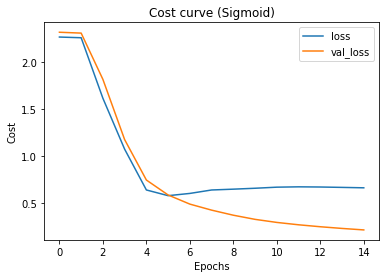

In [41]:
#学習曲線(シグモイド)
plt.plot(nls.loss_list, label='loss')
plt.plot(nls.val_loss_list, label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost curve (Sigmoid)')
plt.legend()
plt.show()

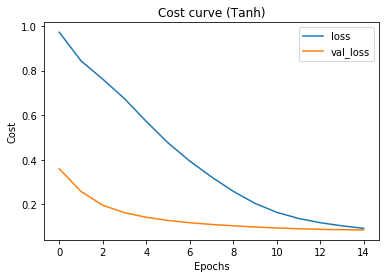

In [42]:
#学習曲線(Tanh)
plt.plot(nlt.loss_list, label='loss')
plt.plot(nlt.val_loss_list, label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost curve (Tanh)')
plt.legend()
plt.show()

## 【問題3】指標値の算出

分類に関する指標値で精度を確認してください。

In [43]:
def evalution(y_test, y_pred):
    '''
     分類問題の指標値を出力する関数
 
     Paraeters
     -------------
    y_test : 次の形のndarray, shape (n_samples, )
        正解値
    y_pred : 次の形のndarray, shape (n_samples, )
        予測したラベル
    '''
    #accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print('accuracy :', accuracy)

    #precision
    precision = precision_score(y_test, y_pred, average='macro')
    print('precision :', precision)

    #recall
    recall = recall_score(y_test, y_pred, average='macro')
    print('recall :', recall)

    #f1
    f1 = f1_score(y_test, y_pred, average='macro')
    print('f1 :', f1)

#### ・検証用データ

In [49]:
#検証用データの指標値の出力(シグモイド)
evalution(y_val, y_pred_s_val)

accuracy : 0.9365833333333333
precision : 0.9362746642512277
recall : 0.9361366250002918
f1 : 0.9359211668389431


In [55]:
#検証用データの指標値の出力(Tanh)
evalution(y_val, y_pred_t_val)

accuracy : 0.9736666666666667
precision : 0.9735107985371103
recall : 0.9734193979949076
f1 : 0.973438177741269


#### ・未知データ

In [44]:
#未知データの指標値の出力(シグモイド)
evalution(y_test, y_pred_s)

accuracy : 0.9386
precision : 0.9380181067028858
recall : 0.9377035655207882
f1 : 0.9376752457973913


In [45]:
#未知データの指標値の出力(Tanh)
evalution(y_test, y_pred_t)

accuracy : 0.9765
precision : 0.9763537989952459
recall : 0.9763616657254524
f1 : 0.9763232933851199


活性化関数がシグモイド関数の場合とハイパポリックタンジェント関数の場合で学習曲線と精度を出力した。学習曲線は、シグモイドの場合は途中までは学習用と検証用と同じように下がっていたが、途中から学習用のlossが下がらなくなっていた。一方、ハイパポリックタンジェント関数は最終的に学習用と検証用の誤差が同じくらいになった。
その結果を反映してか、検証用データと未知データの精度は、どちらもシグモイド関数より、ハイパポリックタンジェント関数のほうがどの指標でも良かった。

## （オプション）誤分類の確認

誤分類した画像はどのようなものだったかを見てみましょう。推定値を用意し、以下のコードを実行してください。

#### ・シグモイド関数

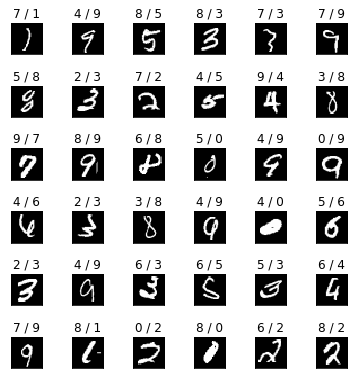

In [56]:
#シグモイド関数
"""
語分類結果を並べて表示する。画像の上の表示は「推定結果/正解」である。

Parameters:
----------
y_pred : 推定値のndarray (n_samples,)
y_val : 検証用データの正解ラベル(n_samples,)
X_val : 検証用データの特徴量（n_samples, n_features)
"""
num = 36 # いくつ表示するか

true_false = y_pred_s_val==y_val
false_list = np.where(true_false==False)[0].astype(np.int)

if false_list.shape[0] < num:
    num = false_list.shape[0]
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(num):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.set_title("{} / {}".format(y_pred_s_val[false_list[i]],y_val[false_list[i]]))
    ax.imshow(X_val.reshape(-1,28,28)[false_list[i]], cmap='gray')

#### ・ハイパポリックタンジェント関数

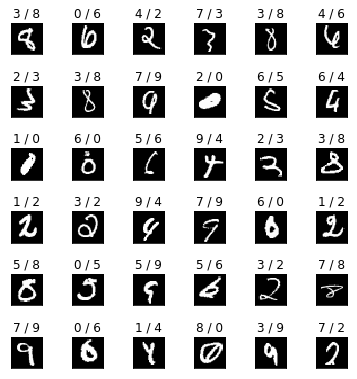

In [57]:
#ハイパポリックタンジェント関数
"""
語分類結果を並べて表示する。画像の上の表示は「推定結果/正解」である。

Parameters:
----------
y_pred : 推定値のndarray (n_samples,)
y_val : 検証用データの正解ラベル(n_samples,)
X_val : 検証用データの特徴量（n_samples, n_features)
"""
num = 36 # いくつ表示するか

true_false = y_pred_t_val==y_val
false_list = np.where(true_false==False)[0].astype(np.int)

if false_list.shape[0] < num:
    num = false_list.shape[0]
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(num):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.set_title("{} / {}".format(y_pred_t_val[false_list[i]],y_val[false_list[i]]))
    ax.imshow(X_val.reshape(-1,28,28)[false_list[i]], cmap='gray')

シグモイド関数とハイパポリックタンジェント関数で、36ずつ誤分類したものを出力した。あくまで個人的な印象としては、シグモイド関数で誤分類したものより、ハイパポリックタンジェント関数で誤分類したものの方が読みづらい数字が多いと感じた。精度はハイパポリックタンジェント関数の方が良かったので、比較的読みやすい数字はシグモイド関数より分類できているのではないかと思う。